Generated a synthetic time-series dataset from 2018-01-01 to 2023-12-01.

First 5 rows of the time-series data:
                Value
2018-01-01  52.483571
2018-02-01  57.308678
2018-03-01  67.228824
2018-04-01  74.115149
2018-05-01  63.819614


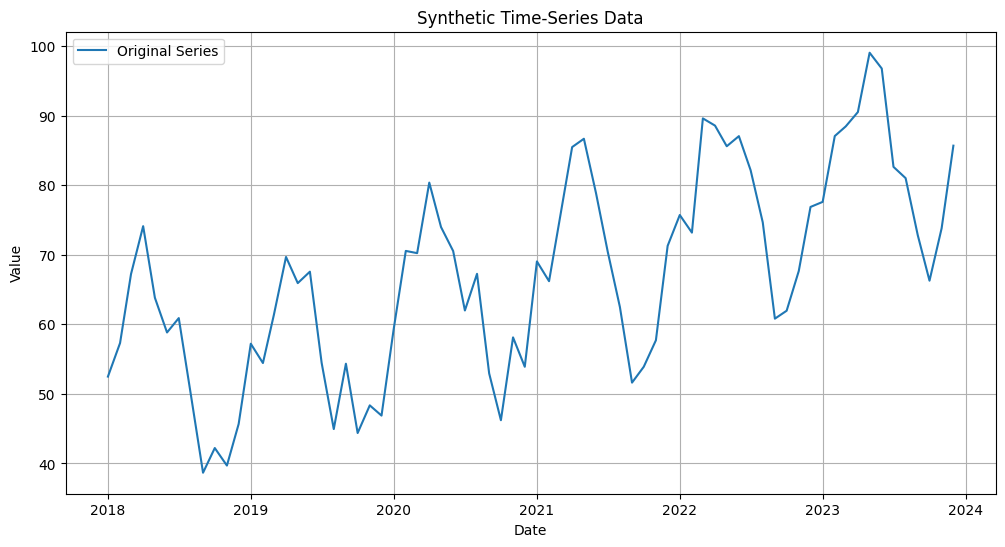

<Figure size 1000x800 with 0 Axes>

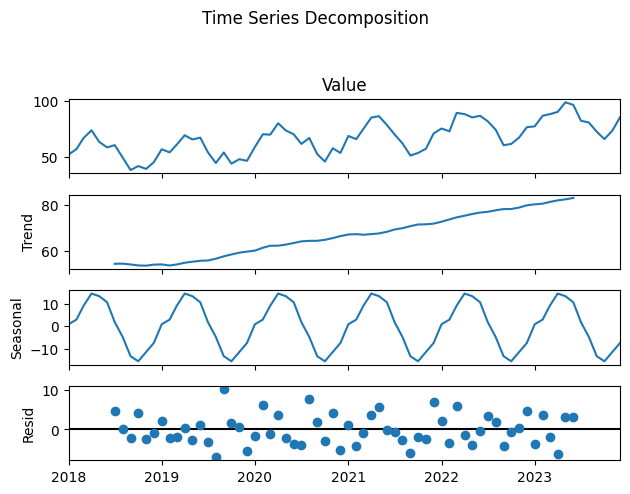

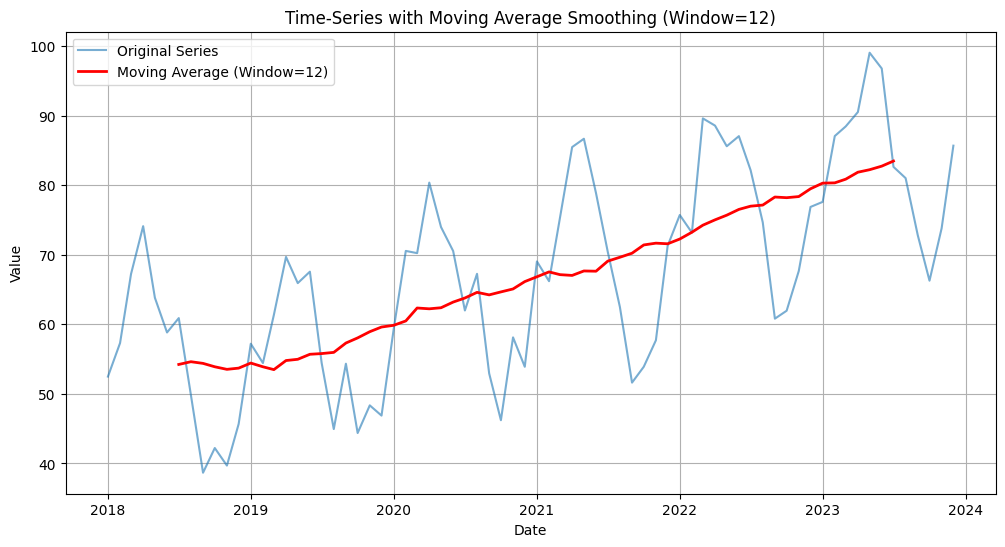

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# --- 1. Generate a Synthetic Time-Series Dataset ---
np.random.seed(42)
start_date = '2018-01-01'
end_date = '2023-12-01'
dates = pd.date_range(start=start_date, end=end_date, freq='MS')
n_points = len(dates)

# Define components: Trend, Seasonality, and Noise
# Linear Trend
trend = np.arange(n_points) * 0.5 + 50

# Seasonality (12-month cycle)
seasonality = 15 * np.sin(2 * np.pi * np.arange(n_points) / 12)

# Noise (Random error)
noise = np.random.normal(0, 5, n_points)

# Combined Series (Additive Model: Y = T + S + R)
series = trend + seasonality + noise

df = pd.DataFrame({'Value': series}, index=dates)

print(f"Generated a synthetic time-series dataset from {start_date} to {end_date}.")
print("\nFirst 5 rows of the time-series data:")
print(df.head())

# --- 2. Plot Original Time-Series Data ---
plt.figure(figsize=(12, 6))
plt.plot(df['Value'], label='Original Series')
plt.title('Synthetic Time-Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show() # Use plt.show() in Jupyter/Colab to display the plot

# --- 3. Decompose the Series into Trend, Seasonality, and Residuals ---
# We assume an 'additive' model (Y = T + S + R) and a period of 12 (monthly data)
decomposition = seasonal_decompose(df['Value'], model='additive', period=12)

# Plot decomposition
plt.figure(figsize=(10, 8))
# decomposition.plot() is a convenient function to plot all components
decomposition.plot() 
plt.suptitle('Time Series Decomposition', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()

# --- 4. Perform Moving Average Smoothing and Plot Results ---
window_size = 12
# The .rolling() method calculates the moving average
df['Moving_Average'] = df['Value'].rolling(window=window_size, center=True).mean()

# Plot moving average smoothing
plt.figure(figsize=(12, 6))
plt.plot(df['Value'], label='Original Series', alpha=0.6)
plt.plot(df['Moving_Average'], label=f'Moving Average (Window={window_size})', color='red', linewidth=2)
plt.title(f'Time-Series with Moving Average Smoothing (Window={window_size})')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()